# Test Normal model implementation

In [1]:
import numpy as np
import pandas as pd
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [2]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy       gap
strike                                
80      21.206877  21.185930 -0.020947
81      20.210824  20.348379  0.137556
82      19.597513  19.526455 -0.071058
83      18.480190  18.720866  0.240675
84      18.036600  17.932279 -0.104322
85      17.333589  17.161318 -0.172271
86      16.351594  16.408558  0.056964
87      15.644685  15.674521  0.029836
88      15.139701  14.959672 -0.180029
89      14.286691  14.264418 -0.022272
90      13.311810  13.589108  0.277298
91      12.908944  12.934027  0.025083
92      12.434155  12.299398 -0.134757
93      11.619982  11.685384  0.065402
94      11.330322  11.092085 -0.238237
95      10.737735  10.519541 -0.218194
96       9.754299   9.967734  0.213436
97       9.479651   9.436589 -0.043062
98       9.029093   8.925975 -0.103118
99       8.818149   8.435711 -0.382438
100      7.863166   7.9

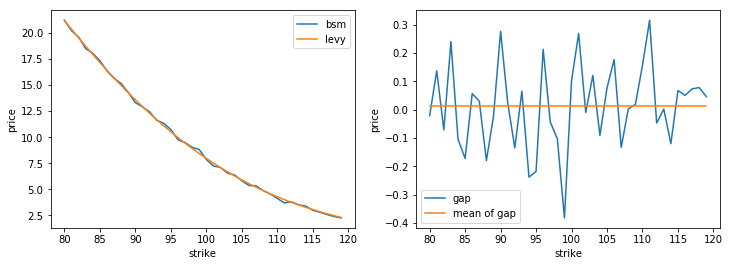

In [3]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

weights: [ 0.25  0.25  0.25  0.25]
cor_m: [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
              bsm       levy       gap
strike                                
80      21.520861  21.185787 -0.335074
81      20.271511  20.348226  0.076714
82      19.672836  19.526291 -0.146545
83      18.534603  18.720690  0.186087
84      17.797714  17.932092  0.134378
85      17.249030  17.161121 -0.087909
86      16.477622  16.408350 -0.069271
87      15.696843  15.674303 -0.022540
88      14.929198  14.959444  0.030246
89      14.264964  14.264181 -0.000782
90      13.467363  13.588862  0.121500
91      12.760941  12.933772  0.172831
92      12.354644  12.299136 -0.055508
93      11.695103  11.685115 -0.009988
94      10.779346  11.091810  0.312464
95      10.466081  10.519260  0.053179
96      10.128413   9.967449 -0.160965
97       9.187448   9.436299  0.248851
98       9.056853   8.925682 -0.13117

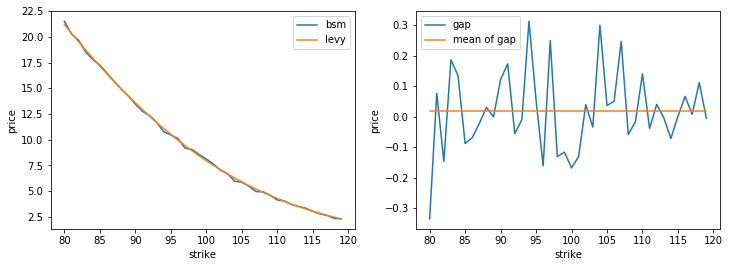

In [4]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

In [5]:
# A test set for spread option

spot = np.array([100, 96])
vol = np.array([0.2, 0.1])
weights = np.array([1, -1])
divr = np.array([1, 1])*0.05
intr = 0.1
cor_m = np.array([[1, 0.5], [0.5, 1]])
texp = 1

price = 8.5132252

weights: [ 1 -1]
cor_m: [[ 1.   0.5]
 [ 0.5  1. ]]


C:\Users\Jeremy\Documents\GitHub\Project-team_asap\option_models\basket_Levy.py:46: RuntimeWarning: divide by zero encountered in log
  d1 = (m - np.log(strike) + v2) / v


             bsm      levy       gap
strike                              
0       8.962500  4.000000 -4.962500
1       8.348240  3.335758 -5.012482
2       7.847422  2.949330 -4.898092
3       7.312372  2.672021 -4.640351
4       6.758295  2.456446 -4.301848
5       6.386596  2.281084 -4.105512
6       6.046063  2.134098 -3.911965
7       5.506952  2.008224 -3.498728
8       5.283956  1.898659 -3.385297
9       4.797022  1.802059 -2.994963
10      4.441188  1.715997 -2.725192
11      4.219733  1.638658 -2.581075
12      3.955358  1.568648 -2.386710
13      3.610720  1.504875 -2.105845
14      3.315754  1.446465 -1.869289
15      3.057753  1.392712 -1.665041
16      2.929426  1.343033 -1.586393
17      2.657046  1.296948 -1.360098
18      2.372696  1.254050 -1.118646
19      2.299891  1.213996 -1.085895
20      2.033141  1.176493 -0.856648
21      1.903713  1.141290 -0.762423
22      1.717814  1.108166 -0.609647
23      1.570148  1.076934 -0.493214
24      1.544220  1.047425 -0.496796
2

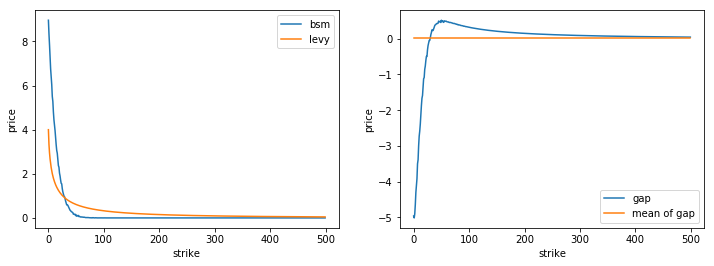

In [133]:
# MC price based on normal model
# make sure that the prices are similar\

print('weights:',weights);print('cor_m:',cor_m)

np.random.seed(123456)
strikeRange = np.arange(0,500,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can find if we price the spread option with levy model, the gap is very large when strike approaches 0

In [6]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
price = 28.0073695

weights: [ 0.25  0.25  0.25  0.25]
cor_m: [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
              bsm       levy       gap
strike                                
80      35.881032  36.398241  0.517210
81      36.262289  35.921035 -0.341255
82      35.078082  35.450670  0.372588
83      34.848356  34.987055  0.138699
84      34.055979  34.530098  0.474120
85      34.415972  34.079709 -0.336263
86      33.763738  33.635796 -0.127942
87      33.912811  33.198270 -0.714540
88      32.296096  32.767041  0.470946
89      33.848807  32.342021 -1.506786
90      33.022150  31.923122 -1.099028
91      31.295782  31.510255  0.214474
92      31.040835  31.103336  0.062501
93      29.456454  30.702278  1.245824
94      29.154234  30.306996  1.152762
95      29.533069  29.917406  0.384337
96      30.417669  29.533426 -0.884243
97      30.061028  29.154973 -0.906055
98      28.553827  28.781965  0.228138
99      28.309863  28.414323  0.104460
100    

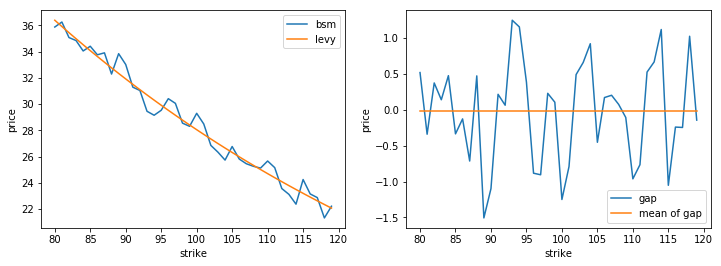

In [7]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can see the levy method much less volatile than bsm model when the vol gets higher